# Variables EXPERT

Esta tabla contiene la información de los expresiones Variables.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'variable__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('variables')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-05 11:05:56.032406 Data cache files found ...
2024-07-05 11:05:56.505068 Data cache files successfully loaded!!
The dataset contains 1167967 (40.81%) instances for BEGINNER class and 1694338 (59.19%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'variables'
TABLE_FEATURES = ['variable__name_convention', 'variable__number_of_characters', 'variable__is_private', 'variable__is_magic']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

Features shape: (1694338, 4)
As we can see the downloaded data contains a total of 1694338 instances. Each of the instances corresponds to a program. For each program we have 4 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1694338 entries, 212 to 2862304
Data columns (total 4 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   variable__name_convention       object
 1   variable__number_of_characters  int64 
 2   variable__is_private            bool  
 3   variable__is_magic              bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 42.0+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 2 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

variable__name_convention         0
variable__number_of_characters    0
variable__is_private              0
variable__is_magic                0
dtype: int64

In [5]:
print_empty_cols(X)

variable__name_convention
-------------------------
0 instancias no tienen un valor para la columna variable__name_convention


variable__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna variable__number_of_characters


variable__is_private
--------------------
0 instancias no tienen un valor para la columna variable__is_private


variable__is_magic
------------------
0 instancias no tienen un valor para la columna variable__is_magic




### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variable__name_convention,1694338,7,Lower,1016285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__number_of_characters,1694338.0,NaN,NaN,NaN,7.59298,5.570619,1.0,4.0,6.0,10.0,82.0
variable__is_private,1694338,2,False,1670488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__is_magic,1694338,2,False,1680001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "variable__number_of_characters": [(0.0, 4.0), (4.0, 4.0), (4.0, 10.0), (10.0, inf)], # min: 0 ; max: 82
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['variable__number_of_characters'], 10))
print(get_statistics(full_table, ['variable__name_convention'], 10))
print(get_statistics(X_copy, ['variable__is_private'], 10))
print(get_statistics(X_copy, ['variable__is_magic'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(full_table, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
variable__number_of_characters  count  percentage
                    [4.0_10.0) 557563   32.907425
                    [10.0_inf] 489285   28.877650
                     [0.0_4.0) 331238   19.549700
                     [4.0_4.0] 316252   18.665225

variable__name_convention   count  percentage
                    Lower 1016285   59.981243
                SnakeCase  447252   26.396858
                  CamelUp  139806    8.251364
                    Upper   55591    3.280986
                 CamelLow   23048    1.360295
                  Discard    7841    0.462777
         NoNameConvention    4515    0.266476

 variable__is_private   count  percentage
                False 1670488   98.592371
                 True   23850    1.407629

 variable__is_magic   count  percentage
              False 1680001   99.153829
               True   14337    0.846171

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (1694338, 10)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

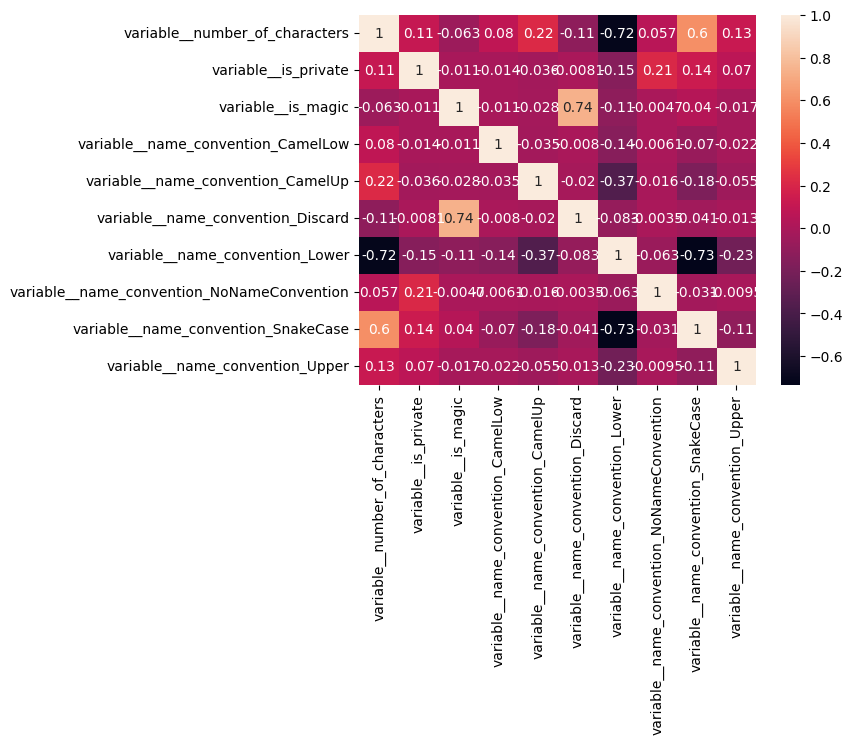

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variables (1 numerica, 2 booleanas y 1 categorica) se hara un analisis detallado

### Variable is_private (1/4)
Esta variable es de tipo booleano y representa si la variable es privada.

<Axes: xlabel='variable__is_private', ylabel='Count'>

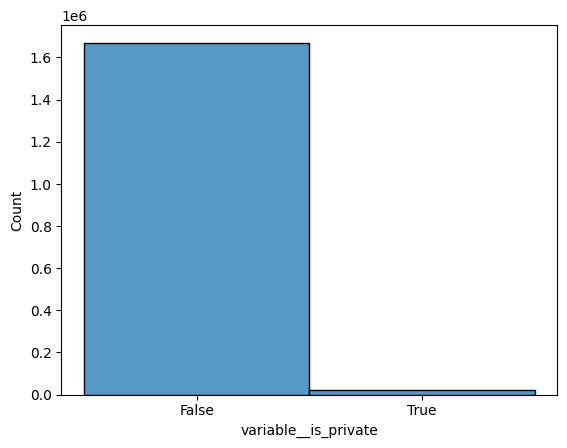

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_private'], discrete=True)

In [11]:
num_true_values = len(X[X['variable__is_private'] == True])
num_false_values = len(X[X['variable__is_private'] == False])
std = X['variable__is_private'].std()
freq_true = len(X[X['variable__is_private'] == True]) / len(X['variable__is_private'])
freq_false = len(X[X['variable__is_private'] == False]) / len(X['variable__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 23850 valores verdaderos y 1670488 valores falsos. Y, la desviación típica es de 0.1178056001663208
La frecuencia con la que programa puede tener la variable is_private a True es 0.014076294104246025.
La frecuencia con la que programa puede tener la variable is_private a False es 0.985923705895754.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_private', possible_values)

La variable variable__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_private toma el valor de 0.0 en un 98.59% de los items.
La variable variable__is_private toma el valor de 1.0 en un 1.408% de los items.


In [13]:
X[X['variable__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,23850.000000,23850.0,23850.0,23850.0,23850.0,23850.0,23850.0,23850.000000,23850.000000,23850.000000
mean,13.913082,1.0,0.0,0.0,0.0,0.0,0.0,0.094130,0.769182,0.136688
std,7.705943,0.0,0.0,0.0,0.0,0.0,0.0,0.292016,0.421365,0.343524
min,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,7.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
50%,13.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,18.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
max,53.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


### Variable is_magic (2/4)
Esta variable es de tipo booleano y representa si la variable es magic.

<Axes: xlabel='variable__is_magic', ylabel='Count'>

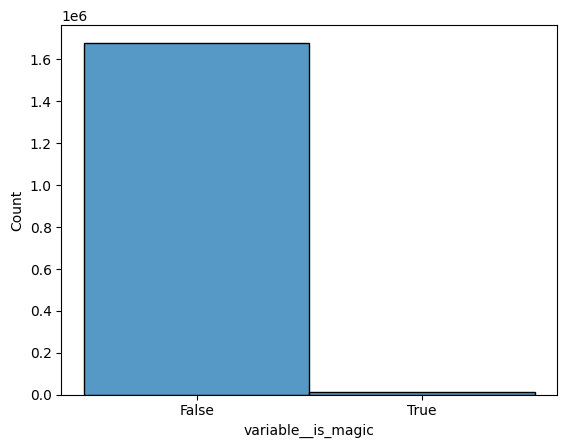

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_magic'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['variable__is_magic'] == True])
num_false_values = len(X[X['variable__is_magic'] == False])
std = X['variable__is_magic'].std()
freq_true = len(X[X['variable__is_magic'] == True]) / len(X['variable__is_magic'])
freq_false = len(X[X['variable__is_magic'] == False]) / len(X['variable__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 14337 valores verdaderos y 1680001 valores falsos. Y, la desviación típica es de 0.09159757941961288
La frecuencia con la que programa puede tener la variable is_magic a True es 0.00846171188983544.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9915382881101645.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_magic', possible_values)

La variable variable__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_magic toma el valor de 0.0 en un 99.15% de los items.
La variable variable__is_magic toma el valor de 1.0 en un 0.8462% de los items.


In [17]:
X[X['variable__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,14337.000000,14337.0,14337.0,14337.0,14337.0,14337.000000,14337.0,14337.000000,14337.000000,14337.000000
mean,4.185953,0.0,1.0,0.0,0.0,0.546907,0.0,0.000070,0.452745,0.000279
std,3.564010,0.0,0.0,0.0,0.0,0.497812,0.0,0.008352,0.497779,0.016701
min,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000
75%,8.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.000000
max,25.000000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000


### Variable number_of_characters (3/4)
Esta variable representa el número de caracteres del nombre de la variable. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 82. Con una media de 7.59.

<Axes: ylabel='variable__number_of_characters'>

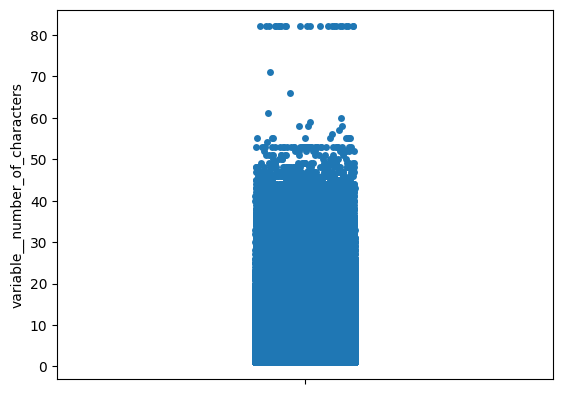

In [18]:
sns.stripplot(X['variable__number_of_characters'])

In [19]:
print_outliers_for_df_column(X, 'variable__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7293159071310067
Rango valores atípicos extremos (Tukey): [-14.0,28.0]
Rango valores atípicos leves (Tukey): [-5.0,19.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.299093721412323,176.41558866167196]
-3.0IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -14.0 (Q1-3*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -5.0 (Q1-1.5*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 68224 instancias tienen un valor para variable__number_of_characters superior a 19.0 (Q3+1.5*IQR) para variable__number_of_characters. Representando un 4.027% del total de instancias.
+3.0IQR: 11019 instancias tienen un valor para variable__number_of_characters superior a 28.0 (Q3-3*IQR) para variable__number_of_characters. Representando un 0.6503

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 28.0 (Con un MC de 72 usamos Tuckey Extremo)

In [20]:
X[X['variable__number_of_characters'] > 28].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper
count,11019.000000,11019.000000,11019.0,11019.000000,11019.000000,11019.0,11019.0,11019.000000,11019.000000,11019.000000
mean,33.620926,0.105363,0.0,0.004175,0.153734,0.0,0.0,0.019784,0.484254,0.338052
std,5.063722,0.307035,0.0,0.064479,0.360710,0.0,0.0,0.139264,0.499775,0.473068
min,29.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,32.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,35.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000
max,82.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


### Variable name_convention (4/4)
Esta variable es de tipo categorica y representa el name convention del nombre de la variable.

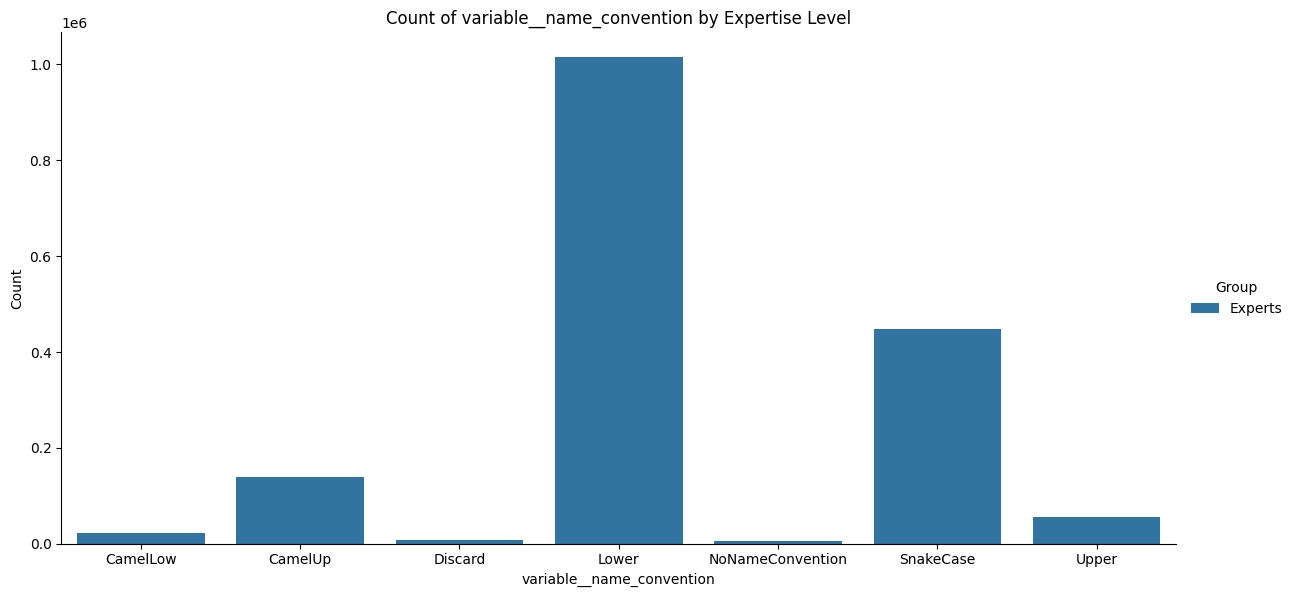

In [21]:
print_categorical_histogram(full_table, 'variable__name_convention',TARGET_FEATURE, include_all=False, include_beginners=False)

In [22]:
print_frequency_anal_for_cat_var(full_table, 'variable__name_convention')

La variable variable__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable variable__name_convention toma el valor de Lower en un 59.98% de los items.
La variable variable__name_convention toma el valor de SnakeCase en un 26.4% de los items.
La variable variable__name_convention toma el valor de CamelUp en un 8.251% de los items.
La variable variable__name_convention toma el valor de Upper en un 3.281% de los items.
La variable variable__name_convention toma el valor de CamelLow en un 1.36% de los items.
La variable variable__name_convention toma el valor de Discard en un 0.4628% de los items.
La variable variable__name_convention toma el valor de NoNameConvention en un 0.2665% de los items.


In [23]:
print_values_usage_for_cat_var(full_table, 'variable__name_convention', NAMING_CONVENTION_VALUES)

La variable variable__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [24]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,variable__name_convention,variable__number_of_characters,variable__is_private,variable__is_magic,variable__expertise_level
1169762,SnakeCase,32,True,False,EXPERT
1234889,NoNameConvention,22,True,False,EXPERT
1270526,Upper,24,True,False,EXPERT
1270527,Upper,26,True,False,EXPERT
1270530,Upper,39,True,False,EXPERT
...,...,...,...,...,...
2852622,NoNameConvention,30,True,False,EXPERT
2852624,NoNameConvention,29,True,False,EXPERT
2852626,NoNameConvention,30,True,False,EXPERT
2852628,NoNameConvention,26,True,False,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [25]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,2015.0,27.889330,6.712359,18.0,23.0,28.0,33.0,53.0
variable__is_private,2015.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
variable__is_magic,2015.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_CamelLow,2015.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_CamelUp,2015.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Discard,2015.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Lower,2015.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_NoNameConvention,2015.0,0.427792,0.494881,0.0,0.0,0.0,1.0,1.0
variable__name_convention_SnakeCase,2015.0,0.391067,0.488110,0.0,0.0,0.0,1.0,1.0
variable__name_convention_Upper,2015.0,0.181141,0.385231,0.0,0.0,0.0,0.0,1.0


In [26]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,1692323.0,7.568813,5.524857,1.0,4.0,6.0,10.0,82.0
variable__is_private,1692323.0,0.012902,0.112854,0.0,0.0,0.0,0.0,1.0
variable__is_magic,1692323.0,0.008472,0.091652,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,1692323.0,0.013619,0.115904,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelUp,1692323.0,0.082612,0.275295,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Discard,1692323.0,0.004633,0.067910,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Lower,1692323.0,0.600527,0.489790,0.0,0.0,1.0,1.0,1.0
variable__name_convention_NoNameConvention,1692323.0,0.002159,0.046410,0.0,0.0,0.0,0.0,1.0
variable__name_convention_SnakeCase,1692323.0,0.263817,0.440702,0.0,0.0,0.0,1.0,1.0
variable__name_convention_Upper,1692323.0,0.032633,0.177675,0.0,0.0,0.0,0.0,1.0
